$$
\def\du#1{\underline{\underline{#1}}}
\DeclareMathOperator*{\maxi}{max}
$$

In [1]:
# Load packages
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt

import statsmodels.api as sm 

from math import log, sqrt, exp 
from scipy import stats
import scipy.optimize as opt

# magic commands
%matplotlib inline

## Brief overview of numerical optimization in Python.

The python code in this notebook builds directly on the code taught in the prerequisite course **Quantitative Methods**.

For good measure, constrained optimization is briefly described here as the syntax is not necessarily very intuitive to read.

In particular, there is no class for directly maximizing functions, so to do that, the negative target function is minimized.

In addition, constraints can only be set to equal zero (C=0) or to be larger than or equal to zero (C>=0).

In [2]:
#First a function is defined to solve numerically:
def target_fun(x): return x**2 # y = x^2

#Then appropriate constraints are defined as follows:
#"type": "eq" means constraint function is: C = 0
#"type": "ineq" means constraint function is: C >= 0
#"type": "ineq" with negative C to change signs: -C =< 0

cons = ({"type":"eq", "fun": lambda x: x - 1}, # x - 1 = 0 <=> x = 1
       {"type":"ineq", "fun": lambda x: x - 0.5 }) # x - 0.5 >= 0 <=> x >= 0.5


#To maximize target function => Minimize the negative target function

#Maxing target function, given start value of 5 and constraints = cons
print(opt.minimize(fun = lambda x: -target_fun(x),
                   x0=[5],
                   constraints=cons).x)

[1.]


# General formulas


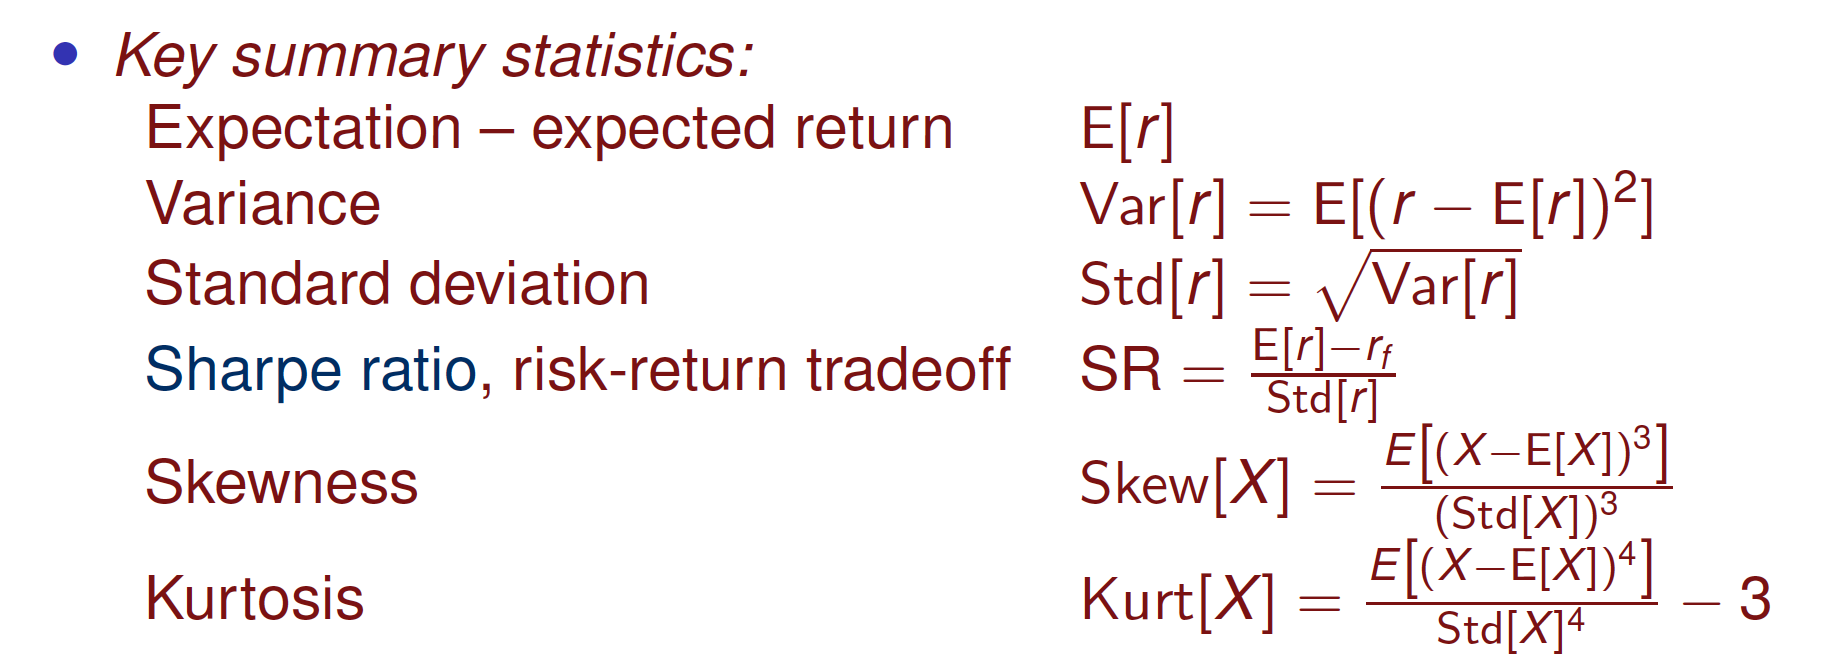


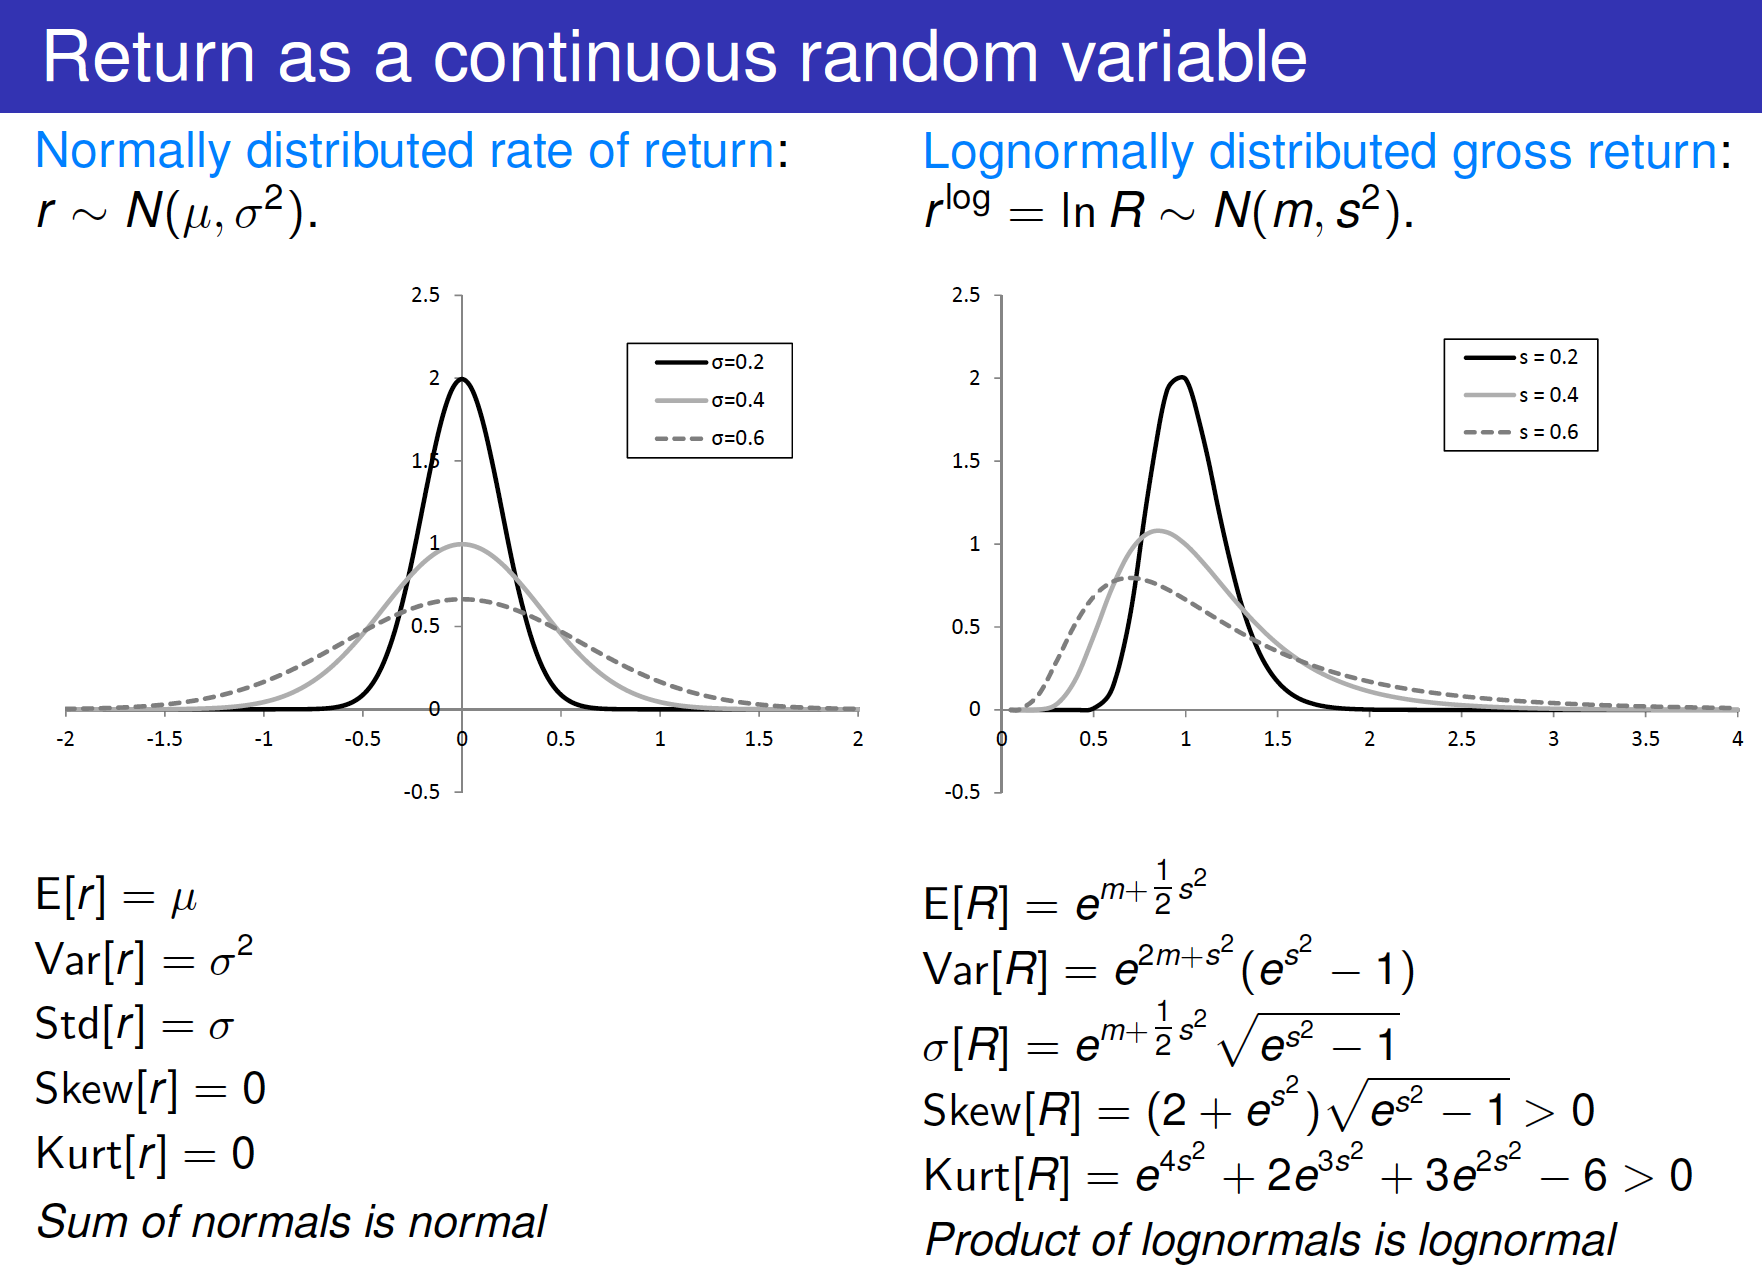

Solving systems of linear equations using linear algebra

$$
Ax = b
$$

$$
x = A^{-1}b
$$

**No-arbitrage weights**

In [3]:
# Aw = 0
# w = A^-1 * 0

A = np.array([[-2, 1, -1.5],
              [1, 1, 2],
              [1, 1, 1]])


zero = np.array([0, 0, 1])

w = np.linalg.inv(A).dot(zero)

print("Weights = ", w)

Weights =  [ 1.16666667  0.83333333 -1.        ]


**Solving for risk premiums**

In [4]:
r_e = 0.15
r_f = 0.01

sensitivities = np.array([[1 , 1],
                          [-1.5, 2]])

equity_premium = np.array([r_e - r_f, r_e - r_f])

RP = np.linalg.inv(sensitivities).dot(equity_premium)

print("RP_1 = {} \nRP_2 = {}".format(round(RP[0], 4), round(RP[1], 4)))

RP_1 = 0.04 
RP_2 = 0.1


# Risk (3)

VaR: Find out if + or minus N_inverse !!!

$$
VaR^{$}(p, T) = \mu_{V} - V_0 + \sigma_V N^{-1}(p) 
$$

$$
VaR^{\%}(p, T) = E[r_p] -  N^{-1}(p)*Std[r_p]
$$

Where

$V_0 =$ Initial investment



In [5]:
#Defining VaR as function
def VaR(p,mu,sigma):
    N_inverse = stats.norm.ppf(p)
    return mu + N_inverse * sigma

Leveraged Return:

$$
r = \frac{E_1}{E_0} - 1 = r_{stock} + \frac{L_0}{E_0}(r_{stock} - r_{loan})
$$

Sharpe Ratio:

$$
SR = \frac{E[r] - r_f}{Std[r]}
$$

Leveraged VaR:

$$
VaR = (1 + \frac{L}{E})VaR_s - \frac{L}{E}r_l
$$

Where $r_l$ is the borrowing rate

In [6]:
#Defining function for levered VaR calculation
def levered_VaR(p,mu,sigma,L,F,rl):
    N_inverse = stats.norm.ppf(p)
    unlevered_var =  mu - N_inverse * sigma
    return (1+L/F)*unlevered_var - L/F * r_l

In [7]:
#Expected shortfall:
def ES(p,mu,std):
    N_inverse = stats.norm.ppf(p)
    return mu - std/(p*np.sqrt(2*np.pi)) * np.exp( -N_inverse**2 / 2 )

ES(0.05, 0.01, 0.08)

-0.15501702460059405

# Portfolio choice (7)

## General portfolio formulae

$$ \mu = \mathbf{w*E[r_i]} $$

$$ \sigma^2 = \mathbf{w'} \sum \mathbf{w} $$

$$ COV[r_i,r_j] = \mathbf{\sigma_i * \sigma_i*\rho}  $$

$$ COV[r,r_{min}] = VAR[r_{min}]$$

In [8]:
####
"""""

Remember to add Residual variance if you don't have standard deviations !

"""""
####

#Function that turns correlation matrix into covariance matrix
def corr_to_COV(sigma, corr_mat): #Takes sigma as a vector and correlation as a matrix
    #Turn Std vector into matrix, with Std on Diagonal and zeros otherwise:
    sigma_mat = np.diag(sigma)

    return sigma_mat.dot(corr_mat).dot(sigma_mat) #Inner product of Std & Corr matrices

Sigma = corr_to_COV(std_assets,corr_mat)
Sigma_inv = np.linalg.inv(Sigma)

print("Sigma:\n",Sigma,"\n\n")
print("Sigma Inverse:\n",Sigma_inv)

NameError: name 'std_assets' is not defined

## Minimum variance portfolio

The (global) minimum-variance portfolio is given by

$$
\pi_{min} = \frac{\du{\sum}^{-1} \mathbf{1}}{\mathbf{1} \cdot \du{\sum}^{-1} \mathbf{1}} \tag{7.23}
$$

In [12]:
#Defining function for minimum-variance portfolio
def port_mv(Sigma,mu,std):
    #Find the inverse of Sigma
    Sigma_inv = np.linalg.inv(Sigma)

    #Create vector of ones with same length as Covariance matrix
    ones = np.ones(len(Sigma))
    
    #Min-Var weights from eq.7.23
    w_mv = Sigma_inv.dot(ones) / ones.dot(Sigma_inv).dot(ones)

    #Calculate expected return and STD
    mu_mv = w_mv.dot(mu)
    std_mv = np.sqrt( w_mv.T.dot(Sigma).dot(w_mv) )

    return w_mv, mu_mv, std_mv #Returns weights, expected return & STD.

w_mv, mu_mv, std_mv = port_mv(Sigma,mu_assets,std_assets)

print("MV port weights: ",w_mv)
print("Expected return MV = ",mu_mv)
print("STD MV = ",std_mv)

NameError: name 'Sigma' is not defined

## Tangency portfolio 

The tangency portfolio is given by 

$$
\pi_{tan} = \frac{\du{\sum}^{-1} (\pmb{\mu} - r_f \pmb{1})}{\pmb{1} \cdot \du{\sum}^{-1} (\pmb{\mu} - r_f \pmb{1})}
$$

In [13]:
#Defining function for tangency portfolio
def port_tan(Sigma,mu, std,rf): 
    #Inverse of Sigma
    Sigma_inv = np.linalg.inv(Sigma)

    #Create vector of ones with same length as Covariance matrix
    ones = np.ones(len(Sigma))

    #Tangency portfolio weights
    w_tan = Sigma_inv.dot( mu - rf ) / ones.dot(Sigma_inv).dot( mu - rf )

    #Calculate expected return and STD
    mu_tan = w_tan.dot(mu)
    std_tan = np.sqrt( w_tan.T.dot(Sigma).dot(w_tan) )

    return w_tan, mu_tan, std_tan #Returns weights, expected return & STD.

w_tan, mu_tan, std_tan = port_tan(Sigma,mu_assets,std_assets,rf)
sharpe_assets = (mu_assets-rf)/std_assets

print("Sharpe ratio for all assets",sharpe_assets)
print("\nTangency port weights: ",w_tan)
print("Expected return Tangency = ",mu_tan)
print("STD Tangency = ",std_tan)



NameError: name 'Sigma' is not defined

# Investment strategies (8)

## Solution without labor income
Solution for CRRA ($\mu$ & 1 are vectors - Sigma is COV):
$$
\pi = \frac{1}{\gamma}\du\Sigma^{-1}(\mu - r_f*1)
$$

Solution with stock index as only risky asset:
$$
\pi = \frac{\mu - r_f}{\gamma\sigma^2} = \frac{\lambda}{\gamma\sigma}
$$
where $\lambda = \frac{\mu-r_f}{\sigma}$

In [14]:
#Defining optimal portfolio as defined above
def w_port_fun(mu,rf,gamma, Sigma):
    #Inverse of Sigma
    Sigma_inv = np.linalg.inv(Sigma)
    return 1/gamma * Sigma_inv.dot(mu-rf)

#Defining optimal portfolio as defined above
def w_s(mu,rf,gamma,std):
    return (mu-rf) / (gamma * std**2)


### Numerical solution for optimal investment

$$ Max(E[r_i]-\frac{1}{2}\gamma*Var[r_i]) $$

In [15]:
def target_fun(w):
    E_r = mu_assets.dot(w) + (1-np.sum(w)) * rf
    Var_r = w.T.dot(Sigma).dot(w)    
    return E_r - 0.5*gamma * Var_r

cons = ({"type":"ineq","fun":lambda w: w}, #weights not negative
       {"type":"ineq","fun":lambda w: 1-np.sum(w)}) #rf not negative

gamma = 1
print("Optimal portfolio for y=1 : ", opt.minimize(lambda w: -target_fun(w),[w_tan]).x)

NameError: name 'w_tan' is not defined

In [16]:
#Defining target function as defined above
def target_fun(w):
    E_r = mu_assets.dot(w) + (1-np.sum(w)) * rf
    Var_r = w.T.dot(Sigma).dot(w)    
    return E_r - 0.5*gamma * Var_r

#Setting constraints
#"type": "eq" means constraint is equal to zero
#"type": "ineq" means constraint is: C >= 0
cons = ({"type":"ineq","fun":lambda w: -(w[0]+ 0.2* w[1] - 1)}) #w_s + 0.2w_b <= 1

#Creating lists to store variables in:
pi_con = []
mu_port_con = []
std_port_con = []
port_con = []

#Looping through different values of gamma
for g in [0.75,1,2,5,10]:
    gamma = g
    
    #Maxing the target function given start weights w_tan, and constraints
    p_temp = opt.minimize(lambda w: -target_fun(w),[w_tan],constraints=cons).x
    print("pi for gamma ={} : ".format(g),p_temp)
    print("weight in rf = ", 1- np.sum(p_temp))

    #Saving the optimized portfolio as well as its return and std.
    pi_con.append(p_temp)
    mu_port_con.append( mu_assets.dot(p_temp) +(1-np.sum(p_temp))*rf )
    std_port_con.append( np.sqrt(p.T.dot(Sigma.dot(p_temp)) ) )
    
    port_con.append("Constrained portfolio for gamma = {}".format(g))

NameError: name 'w_tan' is not defined

## Solution with labor income

Labor income present values:

In [17]:
#Calculating L as an N-year annuity:
def L_N(PMT,N,r):
    return PMT * ( 1-(1+r)**(-N) ) / r

#Calculating L as an N-year growing annuity:
def L_NG(PMT,N,r,g):
    return PMT * (1 - (1+g)**(N) * (1+r)**(-N) ) / (r-g)

Unconstrained optimal portfolio with multiple risky assets

$$
\pi_t = \frac{1}{\gamma} (1 + \frac{L}{F}) (\du{\sum})^{-1} (\boldsymbol{\mu} - r_f \mathbf{1}) - L/F (\du{\sum})^{-1} Cov_t[\mathbf{r}_{t + 1}, r_L] \tag{8.27}
$$

In [18]:
#COV is the covariance vector between Labor income and all the other assets

#cov = Sigma[2,0:2]

#Defining optimal portfolio choice as in eq. (8.27)
def w__port_L_fun(mu,rf,gamma,Sigma,L,F,COV):
    Sigma_inv = np.linalg(Sigma)

    #Splitting equation up in two parts:
    first = 1/gamma * (1+L/F) * Sigma_inv.dot(mu-rf)
    second = L/F * Sigma_inv.dot(COV)
    return first - second

Unconstrained optimal portfolio if stock market is the only risky asset


$$
\pi = \frac{\mu - r_f}{\gamma \sigma_s^2} (1 + \frac{L}{F}) - \frac{L}{F} \frac{\rho_{SL} \sigma_L}{\sigma_S}  \tag{8.28}
$$

In [19]:
#Defining optimal portfolio choice as in eq. (8.28)
def w_sl(mu,rf,gamma,std_s,std_L,L,F,rho):
    first = (mu-rf) / (gamma * std_s**2) * (1+L/F)
    second = L/F * rho * std_L / std_s
    return first - second



### Constrained optimal portfolio
The following objective function must be maximized to get a constrained optimal portfolio weight.

$$
\maxi_{\mathbf{\pi_t}} \{ \boldsymbol{\pi_t} \cdot (\boldsymbol{\mu - r_f \mathbf{1}}) - \frac{\gamma}{2} *\frac{1}{1 + \frac{L}{F}} (\boldsymbol{\pi_t} \cdot \du{\sum} \boldsymbol{\pi_t} + 2 \frac{L}{F} \boldsymbol{\pi_t} \cdot Cov_t[\mathbf{r}_{t + 1}, r_L]) \} \tag{8.26}
$$

In [20]:
#Define COV as covariance vector between Labor income & all other assets

#COV = Sigma[2,0:2]

gamma = 3

#Setting target function to solve
def target_fun(w):
    first = w.dot(mu_basic-rf)
    
    scalar = gamma / 2 * 1/(1+L/F)
    second = w.dot(Sigma_basic).dot(w.T) + 2 * L/F * w.dot(COV)
    return first - scalar * second



#Setting constraints
#"type": "eq" means constraint is equal to zero
#"type": "ineq" means constraint is: C >= 0
cons = ({"type":"ineq", "fun": lambda w: w}, # w >= 0
       {"type":"ineq", "fun": lambda w: 1 - np.sum(w)}) #rf >= 0

#Minimizing the negative target function => Maximizing target function.
#Starting values are in square bracket [] and with using constraints above

w_con = opt.minimize(lambda w: -target_fun(w), [0.5,0.5], constraints=cons).x
print("Opimtal portfolio weights = ",w_con)
print("Optimal position in rf = ", 1-w_con)

NameError: name 'mu_basic' is not defined

## Loss due to subopimal investments

The wealth-equivalent loss is given by

$$
l(\pi) = 1 - e^{-\frac{\gamma \sigma^2}{2}(\pi^* - \pi)^2 T} \sim \frac{\gamma \sigma^2}{2}(\pi^* - \pi)^2 T \tag{8.14}
$$

In [21]:
########## INPUT ##########

gamma = 3
rf = 0.01
sigma = 0.20
mu = 0.07

T = 10
mu_optimal = 0.05

##########################


pi_optimal = (mu_optimal - rf) / (gamma * sigma**2)

pi = (mu - rf) / (gamma * sigma**2)

loss = gamma * sigma**2 / 2 * (pi_optimal - pi)**2 * T

print("Loss = {}%".format(round((1 - np.exp(-loss)) * 100, 2)))
print("Approx. loss = {}%".format(round(loss * 100, 2)))

Loss = 1.65%
Approx. loss = 1.67%


## Retirement savings

In [22]:
# for T = 60

# annual income
L = 50e3
# growth of income
g = 0.01
# fraction of income saved
k = 0.10
# return on last year's savings
r = 0.04

pmt = L * k

for i in range(30):
    pmt = pmt + L * k * (1 + g)**(i + 1) + pmt * r

pmt

335301.0009904008

## Probability for stock outperformance or underperformance

The gross return on the stock market index over any $T$-year period is given by

$$
R_T^{stock} = e^{( \mu - \frac{1}{2}\sigma^2)T + \sigma \epsilon \sqrt{T}} \tag{8.13}
$$

The gross risk-free return over the $T$-year period is $e^{r_f \times T}$, hence the probability is

$$
\begin{split}
Prob(R_T^{stock} > e^{r_f \times T})
& = Prob(e^{( \mu - \frac{1}{2}\sigma^2)T + \sigma \epsilon \sqrt{T}} > e^{r_f \times T}) \\
& = Prob(( \mu - \frac{1}{2}\sigma^2)T + \sigma \epsilon \sqrt{T} > r_f T) \\
& = Prob( \sigma \epsilon \sqrt{T} > -(\mu - r_f - \frac{1}{2}\sigma^2) T) \\
& = Prob(\epsilon > -\frac{(\mu - r_f - \frac{1}{2} \sigma^2)\sqrt{T}}{\sigma}) \\
& = Prob(\epsilon < \frac{(\mu - r_f - \frac{1}{2} \sigma^2)\sqrt{T}}{\sigma}) \\
& = N(\frac{(\mu - r_f - \frac{1}{2} \sigma^2)\sqrt{T}}{\sigma})
\end{split}
$$

In [23]:
# information which we are provided
T = 10
mu = 0.05
rf = 0.01
sigma = 0.2

# using the above formula
expression = ((mu - rf - 0.5 * sigma**2) * np.sqrt(T) / sigma)
prob = stats.norm.cdf(expression)

print("Probability of outperformance = {}%".format(prob * 100, 2))

Probability of outperformance = 62.40851829770754%


Probability that a stock investment will provide a return wich is K percentage points lower than a risk-free investment over the same period is given by

$$
\begin{split}
Prob(R_T^{stock} > e^{r_f \times T} - K)
& = Prob((\mu - \frac{1}{2}\sigma^2)T + \sigma \epsilon \sqrt{T} < ln(e^{r_f \times T}) \\
& = Prob(\epsilon < \frac{ln(e^{r_f \times T} - K) - (\mu - \frac{1}{2} \sigma^2) T}{\sigma \sqrt{T}}) \\
& = N(\frac{ln(e^{r_f \times T} - K) - (\mu - \frac{1}{2} \sigma^2) T}{\sigma \sqrt{T}})
\end{split}
$$

# CAPM (9)

## The basic CAPM

$$
E(R_i) = R_f + \beta_i (E(R_M) - R_f)
$$

Where

$$
\beta_i = \frac{Cov(R_i, R_M)}{Var(R_M)}
$$

The following also needs to hold if the CAPM is to hold

$$
E[r_i] = r_f + \frac{Cov[r_i, r_m]}{Var[r_m]} (E[r_m] - r_f) = r_f + \frac{\rho_{im} \sigma_i \sigma_m}{\sigma_m^2} (E[r_m] - r_f) = r_f + \rho_{im} \sigma_i SR_m
$$

The correlation can be calculated in the following way

$$
\beta_i = \frac{Cov[r_i, r_m]}{Var[r_m]} = Corr[r_i, r_m] \frac{Std[r_i]}{Std[r_m]}
$$

Isolating for $Corr[r_i, r_m]$ we get

$$
Corr[r_i, r_m] = \beta_i \frac{Std[r_m]}{Std[r_i]}
$$

$$
Cov[r_i, r_j] = \beta_i \beta_j Var[r_m]
$$

# Factor models (10)

$$\beta_A=\sum_i\pi_i*\beta_i$$

## A general one-factor model (10.1)

$$ Var[r_i] = \beta_i^2 Var[F] + Var[\epsilon_i] $$

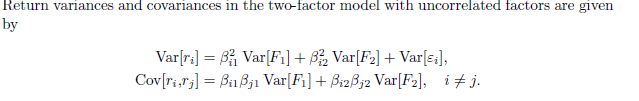

## The Arbitrage Pricing Theory (10.4)

The k-factor model is given by

$$
E[r_i] = r_f + \beta_{i1} \times RP_1 + ... + \beta_{iK} \times RP_K
$$

$$
Var[r_i] = \beta_{i1}^2 Var[F_1] + \beta_{i2}^2 Var[F_2] + Var[e_i]
$$

$$
Cov[r_i, r_j] = \beta_{i1} \beta_{j1} Var[F_1] + \beta_{i2} \beta_{j2} Var[F_2]
$$

![Texte alternatif…](https://scontent.fbru3-1.fna.fbcdn.net/v/t1.15752-9/82439690_2552851071663000_5468515505599938560_n.png?_nc_cat=108&_nc_ohc=e1VYkDHW7tkAQm2oknWRmzyYHGk8JxrZ9B2rljowGUs5G4bWKlzsHLO3Q&_nc_ht=scontent.fbru3-1.fna&oh=b2390faebf6732c3277d3ac841999a2a&oe=5EAD08F5)

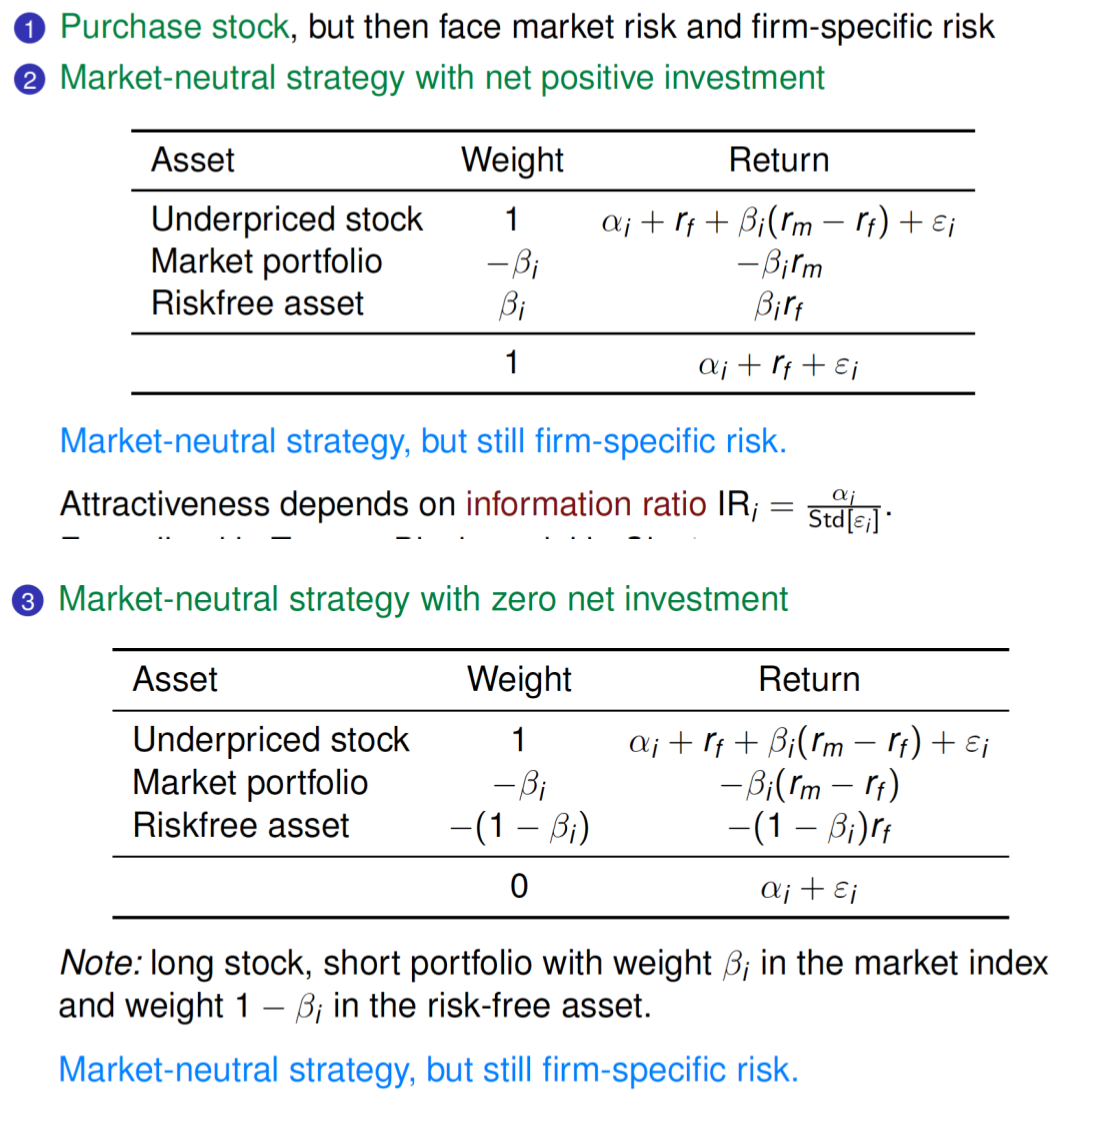

# Active Portfolio Management (12)

## Steps in finding active portfolio & combination with market port

Weights in non-zero alpha assets:
$$
\pi_i = \frac{\frac{\alpha_i}{VAR[\epsilon_i]}}
            {\sum_{k=1}^K\frac{\alpha_i}{VAR[\epsilon_i]}}
$$


Alpha, beta & expected return of active portfolio are simply weighted sums:
$$\alpha_A=\sum_i\pi_i*\alpha_i $$
$$\beta_A=\sum_i\pi_i*\beta_i$$
$$E[r_A]=\sum_i\pi_i*E[r_i] $$


### STD of active portfolio
$$ VAR[\epsilon_A] = \sum_i\pi_i^2VAR[\epsilon_i] $$

$$ Var[r_a] = \beta_A^2 Var[r_m] + Var[\epsilon_A] $$

$$ STD[r_A] = \sqrt{ \beta_A^2VAR[r_m] + VAR[\epsilon_A] } $$

In [24]:
rf = 0.01
mu_m = 0.05
std_m = 0.2
var_m = std_m**2

#Defining alpha, beta and std[eps] as vectors
assets = ["GG","HH","II","JJ"]
alpha = np.array([0.05,0.04,-0.05,-0.02])
beta = np.array([2,1,1.25,1.5])
std_eps = np.array([0.5,0.3,0.4,0.4])

mu_assets = rf+ alpha + beta*(mu_m-rf)
var_assets = beta**2 * std_m**2 + std_eps**2
std_assets = np.sqrt( var_assets )

#Storing all results in a DataFrame for better overview
df = pd.DataFrame(np.array([mu_assets,std_assets,var_assets,alpha,beta,std_eps,std_eps**2]).T,
        index =assets, columns = ["mu","std","var","alpha","beta","std[eps]","var[eps]"])
df

,mu,std,var,alpha,beta,std[eps],var[eps]
GG,0.14,0.640312,0.4100,0.05,2.00,0.5,0.25
HH,0.09,0.360555,0.1300,0.04,1.00,0.3,0.09
II,0.01,0.471699,0.2225,-0.05,1.25,0.4,0.16
JJ,0.05,0.500000,0.2500,-0.02,1.50,0.4,0.16


In [25]:
##########
""""
THIS CELL REQUIRES a dataframe with the following variables:
- mu
- alpha
- beta
- Var[eps]

And constants:
- Variance of market
- rf

"""
###########

#Calculating weights of each asset
df["weights"] = (df["alpha"] / df["var[eps]"]) / ( np.sum( df["alpha"] / df["var[eps]"]) )

#Alpha, beta, expected return
alpha_a = sum(df["alpha"] * df["weights"]) 
beta_a = sum(df["beta"] * df["weights"])
mu_a = sum(df["mu"] * df["weights"] )

#Variance & Std
var_port_res = sum( df["weights"]**2 * df["var[eps]"] )
var_port_a = beta_a**2 *var_m + var_port_res
std_port_a = np.sqrt( var_port_a )

sharpe_port_a = (mu_a-rf)/std_port_a

#Printing results
display(df)
print("\nAlpha Active = ",alpha_a)
print("Beta Active = ",beta_a)
print("Mu Active = ",mu_a)

print("-----------------")

print("Residual portfolio variance = ",var_port_res)
print("Active portfolio variance = ",var_port_a)
print("Active portfolio STD = ",std_port_a)
print("Active portfolio Sharpe = ",sharpe_port_a)

,mu,std,var,alpha,beta,std[eps],var[eps],weights
GG,0.14,0.640312,0.4100,0.05,2.00,0.5,0.25,0.966443
HH,0.09,0.360555,0.1300,0.04,1.00,0.3,0.09,2.147651
II,0.01,0.471699,0.2225,-0.05,1.25,0.4,0.16,-1.510067
JJ,0.05,0.500000,0.2500,-0.02,1.50,0.4,0.16,-0.604027



Alpha Active =  0.2218120805369126
Beta Active =  1.2869127516778522
Mu Active =  0.2832885906040267
-----------------
Residual portfolio variance =  1.0718436106481675
Active portfolio variance =  1.13808938786541
Active portfolio STD =  1.0668127238955345
Active portfolio Sharpe =  0.25617297627093916


The optimal combination of active portfolio and market is given by:
$$
w_A^* = \frac{\frac{\alpha_A}{VAR[\epsilon_A]}}
            {\frac{E[r_m]-rf}{VAR[r_m]} +(1-\beta_A)\frac{\alpha_A}{VAR[\epsilon_i]}}
$$



Standard deviation is given as for any two asset portfolio:
$$
VAR[r_p] = w_A^2*VAR[r_A] + (1-w_A)^2VAR[r_m] + 2*w_A*(1-w_A)*COV[r_a,r_m]
$$

where $COV[r_A,r_m] = \beta_AVAR[r_m]$

Squared SHarpe ratio then satisfies:
$$
SR_p^2 = SR_m^2 + (\frac{\alpha_A}{STD[\epsilon_A]})^2
$$

In [26]:
#Optimal weight in active portfolio
w_a = (alpha_a / var_port_res) / ( (mu_m-rf)/var_m  + (1-beta_a)*alpha_a/var_port_res )

# Expected return, Var & Std of tangency portfolio
mu_port = w_a*mu_a + (1-w_a)*mu_m
var_port = w_a**2 * var_port_a + (1-w_a)**2 * var_m + 2*w_a*(1-w_a)*beta_a*var_m
std_port = np.sqrt(var_port)

sharpe_port = (mu_port-rf)/std_port

print("Optimal combination of active portfolio & market:\n")
print("Weight in active portfolio = ",w_a, "\nWeight in market porfolio = ",1-w_a)
print("\nE[rp] = ",mu_port)
print("Var[rp] = ",var_port)
print("Std[rp] = ",std_port)
print("Sharpe = ",sharpe_port)

Optimal combination of active portfolio & market:

Weight in active portfolio =  0.22000738279808071 
Weight in market porfolio =  0.7799926172019193

E[rp] =  0.10132521225544484
Var[rp] =  0.09708992665030683
Std[rp] =  0.31159256513964967
Sharpe =  0.29309175658448294


### Breakdown of allocation between market, active port & rf

$$
\pi = \frac{\mu_{tan} - r_f}{\gamma\sigma^2} 
$$

In [27]:
gamma = 2

#Optimal allocation between rp & rf:
pi_rp_rf = (mu_port-rf) / (gamma*var_port)

#Optimal allocation between active port & market
pi_a_m = pi_rp_rf * w_a

print("Weights when investing in all assets:\n")
pd.DataFrame(data = [pi_rp_rf,(1-pi_rp_rf),pi_a_m,(pi_rp_rf*(1-w_a))],
            index = ["w_a+market","rf","Active port","Market port"],
            columns = ["Portfolio weights"])

Weights when investing in all assets:



,Portfolio weights
w_a+market,0.470312
rf,0.529688
Active port,0.103472
Market port,0.366840


## Performance Evaluation (12.4)

**Sharpe Ratio**

$$
SR = \frac{\bar{r_p} - \bar{r_f}}{\sigma_p} \tag{12.9}
$$

**M-squared**
$$
M_p^2 = \bar{r_p} \cdot \frac{\sigma_m}{\sigma_p} + \bar{r_f} (1 - \frac{\sigma_m}{\sigma_p}) \tag{12.10}
$$

$$
M^2_p = \bar{r_m} + \sigma_m (SR_p - SR_m) \tag{12.11}
$$

**Treynor Ratio**

$$
TR_i = \frac{r_i - r_f}{\beta_i} \tag{9.15}
$$

**Information Ratio**

$$
IR = \frac{\alpha_p}{\sigma[\epsilon_p]}
$$

Where

$$
\alpha_p = \bar{r_p} - (\bar{r_f} + \beta_p [\bar{r_m} - \bar{r_f}])
$$

In [28]:
def sharpe_fun(rp,rf,sigma): return (rp-rf)/sigma

def M2(rp,rf,std_m,std_p):
    return rp*std_m / std_p + rf*(1-std_m/std_p)

def Treynor_R(r_i,rf,beta_i): return (r_i-rf) / beta_i

def Info_R(alpha,std_eps): return alpha / std_eps

# Plots

Basic empty plot

No handles with labels found to put in legend.


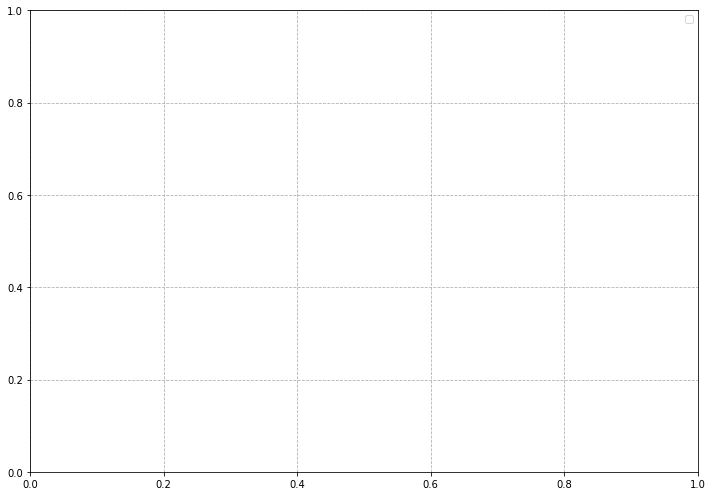

In [29]:
# Iniatize plot 
fig,ax = plt.subplots(figsize=(10,7))


# Plots
#plt.plot(std_c,mu_c, color="red", label="Risky assets")

#Scatter
#plt.scatter(std_tan , mu_tan, color="green", zorder=5, label="Tangency Port",lw=10)

# labels, limits, etc.
#plt.xlabel('Standard Deviation', fontsize=15)
#plt.ylabel('Expected Return', fontsize=15)
#plt.xlim(0,0.9)
#plt.ylim(-0.1,0.25)

# legend & title
#plt.title("Efficient frontier", fontsize=25)
plt.legend()

# grid
plt.grid(True, linestyle="--")

# tight layout
plt.tight_layout()

### Efficient frontier

In [30]:
#Creating a list of weights to loop through
weights = np.arange(-4,4,0.01)

#Lists to store results in
mu_c = []
std_c = []

mu_CML = []
std_CML = []

#Looping through a range of weights
for w in weights:
    
    #Calculate efficient frontier of risky assets
    w_c = w * w_mv + (1-w) * w_tan #Combining MV and Tangency
    mu_c.append(mu_assets.dot(w_c))
    std_c.append( np.sqrt( w_c.T.dot(Sigma).dot(w_c) ) )
    
    #Calculate efficient frontier of all assets
    mu_CML.append( w*mu_tan + (1-w)*rf ) #Combining Tangency & rf
    std_CML.append( np.abs(w*std_tan) )

    
# Iniatize plot 
fig,ax = plt.subplots(figsize=(10,7))


# Plots of efficient frontiers
plt.plot(std_c,mu_c, color="red", label="Risky assets")
plt.plot(std_CML,mu_CML, color="blue", label="All assets")


#Scatter of asset & portfolio locations
for (x,y,name) in zip(std_assets,mu_assets,assets):
    plt.scatter(x, y, zorder=5, label=name, marker = "s")
    
plt.scatter(std_mv, mu_mv, color="red", zorder=5, label="MV Port",lw=10)
plt.scatter(std_tan , mu_tan, color="green", zorder=5, label="Tangency Port",lw=10)

# labels, limits, etc.
plt.xlabel('Standard Deviation', fontsize=15)
plt.ylabel('Expected Return', fontsize=15)
#plt.xlim(0,0.9)
#plt.ylim(-0.1,0.25)

# legend & title
plt.title("Efficient frontier", fontsize=25)
plt.legend()

# grid
plt.grid(True, linestyle="--")

# tight layout
plt.tight_layout()

NameError: name 'w_mv' is not defined

# Bonds (5)

## Annuity

In [ ]:
principal = 100
coupon_rate = 0.05
n = 3

# calculate annual payment
pmt = principal * coupon_rate / (1 - (1 + coupon_rate)**-n)

print("Annual payment = {}".format(pmt))

## YTM formula / approach

In [ ]:
def ytm_function(y):
    df["PV own"] = df["Payment"] / (1+y)**(df["t"])
    return df["PV own"].sum() - df["PV zero"].sum()

bullet_y = opt.fsolve(ytm_function,0.2)[0]
df["PV own"] = df["Payment"] / (1+bullet_y)**(df["t"])

display(df)
print("\n")
print("Yield-to-maturity = ", bullet_y)

## Duration + Convexity formula

In [ ]:
df['Weight'] = df['Payment'] * (1 + bullet_y)**(-df['t']) / bullet_price

duration = (df['t'] * df['Weight']).sum()
convexity = np.sum(df['t']* (df['t'] + 1) * df['Weight'])

print("Duration = ", duration)
print("Convexity = ", convexity)

## Immunization (5.9)



Let $\pi_1$ be the weight of the first bond while $\pi_2$ is the weight of the second bond. We can calculate these weights in the following way.

$$
\pi_1 = \frac{\bar{D} - D_2}{D_1 - D_2} \tag{5.65}
$$

$$
\pi_2 = 1 - \frac{\bar{D} - D_2}{D_1 - D_2} = \frac{D_1 - \bar{D}}{D_1 - D_2} = 1 - \pi_2 \tag{5.66}
$$

The related units of each bond is found using the following formulas

$$
N_1 = \frac{\pi_1 \bar{B}}{B_1} = \frac{\bar{B}}{B_1}\frac{\bar{D} - D_2}{D_1 - D_2} \tag{5.67}
$$

$$
N_2 = \frac{\pi_2 \bar{B}}{B_2} = \frac{\bar{B}}{B_2}\frac{D_1 - \bar{D}}{D_1 - D_2} \tag{5.68}
$$

In [ ]:
########## INPUTS ##########
value_guarantee = 1e6
zero_coupon_rate = 0.0165
duration_liability = 5

duration_bond_1 =  5.595889230090081
duration_bond_2 =  1.9594007036692382
bond_price_1 = 1000.2285441448073
bond_price_2 = 1068.9394124179626

###########################


'''
First we find the weight used for each bond in the portfolio
'''

# using (5.65) and (5.66)
weight_1 = ((duration_liability - duration_bond_2) / (duration_bond_1 - duration_bond_2))
weight_2 = 1 - weight_1

print("pi_1 = {}% \npi_2 = {}%".format(round(weight_1 * 100, 2), round(weight_2 * 100, 2)))

'''
Then we calculate the associated units of each bond in the portfolio
'''
print("\n")

n_1 = weight_2 * value_guarantee * (1 + zero_coupon_rate)**(-duration_liability) / bond_price_1
n_2 = weight_1 * value_guarantee * (1 + zero_coupon_rate)**(-duration_liability) / bond_price_2

print("N_1 = {} \nN_2 = {}".format(round(n_1, 4), round(n_2, 4)))